# Diminos Store – Delivery Time Analysis

Complete EDA & SLA Performance Analysis


## Problem Statement
Diminos requires that **95th percentile of delivery time must be below 31 minutes**.
This notebook analyzes store performance and provides business insights.


## Importing the necessary libraries.

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset.

In [4]:
df = pd.read_csv("diminos_data.csv")
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


## Checking for the shape.

In [6]:
df.shape

(15000, 4)

**Observation**
- There are `15000 rows` and `4 columns` present in the dataset.

## Checking for info.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            15000 non-null  int64         
 1   order_placed_at     15000 non-null  datetime64[ns]
 2   order_delivered_at  15000 non-null  datetime64[ns]
 3   delivery_time_min   15000 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 468.9 KB


##  Data Preprocessing

In [8]:

df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])
df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at'])

df['delivery_time_min'] = (
    df['order_delivered_at'] - df['order_placed_at']
).dt.total_seconds() / 60


In [9]:
df[['delivery_time_min']].describe()

,delivery_time_min
count,15000.000000
mean,20.499389
std,96.160362
min,15.000010
25%,15.274826
50%,15.797986
75%,17.279661
max,7299.831375


In [12]:
df

,order_id,order_placed_at,order_delivered_at,delivery_time_min
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17.140719
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,15.598754
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15.104856
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,38.533657
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16.176984
...,...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378,15.540156
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912,16.744549
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238,15.411271
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358,15.963506


##  Key SLA Metrics

In [10]:

p95 = np.percentile(df['delivery_time_min'], 95)
mean_time = df['delivery_time_min'].mean()
late_pct = (df['delivery_time_min'] > 31).mean() * 100

print("Average Delivery Time:", round(mean_time,2))
print("95th Percentile Delivery Time:", round(p95,2))
print("% Orders > 31 mins:", round(late_pct,2))


Average Delivery Time: 20.5
95th Percentile Delivery Time: 27.26
% Orders > 31 mins: 3.71


##  Delivery Time Distribution

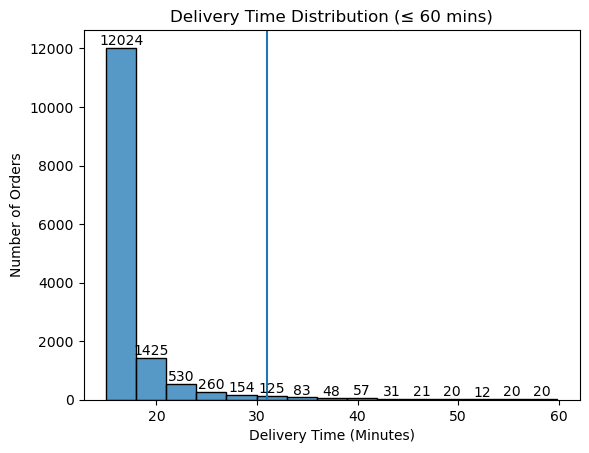

In [27]:

df_clean = df[df['delivery_time_min'] <= 60]

plt.figure()
a = sns.histplot(df_clean['delivery_time_min'], bins=15)

for i in a.containers:
    a.bar_label(i)

plt.axvline(31)
plt.xlabel("Delivery Time (Minutes)")
plt.ylabel("Number of Orders")
plt.title("Delivery Time Distribution (≤ 60 mins)")
plt.show()


##  Insights
- Store meets SLA (95th percentile < 31 mins)
- Few extreme delays can impact SLA
- Focus on long-tail delays
---


## Business Risk Identification

- Peak hour congestion
- Night-time staff shortage
- Sudden order spikes
- Long-distance deliveries
- Kitchen delays
---


## Actionable Recommendations

1. Control extreme delays (>30 mins)
2. Increase staff during peak hours
3. Monitor rolling 95th percentile
4. Maintain internal target of 27–28 mins



## Final Conclusion
Kanav's store is currently **SAFE**, but proactive monitoring is required
to prevent SLA violations.

- Risk exists if delayed orders increase
- Focus on reducing slowest 5% deliveries
